# Pipeline : build a classifier
## data processing of the manually annoted dataset
## image processing : extraction of RGB volumes
## classifier based on WND-charm Model
## PCA & RDF
## Analyse False Positives

In [1]:
import numpy as np
import pandas as pd
from functools import partial
import multiprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as cm

In [2]:
%run ./configure.ipynb

In [3]:
%run ../Connection_to_server.ipynb

## Load the pre-processed Data 

In [4]:
%run ./DF_Pre_Processing_MOINS_Neurons.ipynb

# 1- Pre- processing of Original Data

In [5]:
Data_FRAMES=pd.read_pickle(projectpath+'io/Output/Data_FRAMES.pkl')

# 2- Get volumes with Multiprocessing

In [6]:
%run ./Get_Partial_Data.ipynb

## Load Normalized volums as numpy array

In [7]:
filename_M_DF =projectpath+'io/Output/M_DF.npy'

In [8]:
M_DF_parallel=np.load(filename_M_DF)

In [9]:
M_DF_parallel.shape

(1055, 25, 25, 3)

# 3- Display the RGB images corresponding to normalized volums

In [10]:
%run ./Display_RGB_Vol.ipynb

# 4- WND CHARM Method

## 4.1- Convert RGB images to Grayscale

In [11]:
%run ./RGB2GRAY.ipynb

## Load the gray images as numpy array

In [12]:
filename_Gray_IM =projectpath+'io/Output/GRAY_IM.npy'

In [13]:
GRAY_IM_parallel=np.load(filename_Gray_IM)

# Display images by class ( 1 or 2)

## 4.2- Extraction of the WND-CHARM Features

In [14]:
%run ./Features_Exctraction.ipynb

## Load the extracted Features

In [15]:
filename_FEATURES =projectpath+'io/Output/FEATURES.npy'

In [16]:
FEATURES=np.load(filename_FEATURES)

## Etablish one np.array for the Features' Names & another one for Features' Values

In [17]:
FEAT_NAMES=FEATURES[:,1,:]

In [18]:
FEAT_VALUES=FEATURES[:,0,:]

In [19]:
FEAT_VALUES=FEAT_VALUES.astype(float)

In [20]:
filename_FEATURES_Val =projectpath+'io/Output/FEATURES_Val.npy'

In [21]:
np.save(filename_FEATURES_Val,FEAT_VALUES)

In [22]:
FEAT_VALUES=np.load(filename_FEATURES_Val)

# 4.3- Features Post- processing

## A- Get the normalized Features

In [23]:
%run ./Features_Normalization.ipynb

## Load the Normalized Features values

In [24]:
filename_FVN =projectpath+'io/Output/FV_N.npy'

In [25]:
FV_N=np.load(filename_FVN)

# PCA & Random Forest Classification

/home/tbacoyannis/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/tbacoyannis/.local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Pipeline(steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=70, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('Random_Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=...stimators=200, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])


/home/tbacoyannis/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


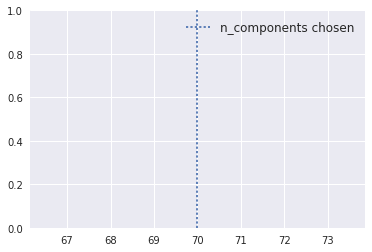

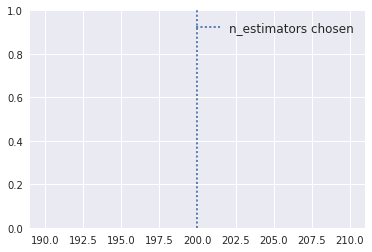

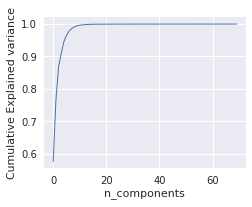

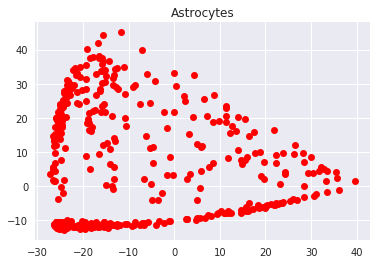

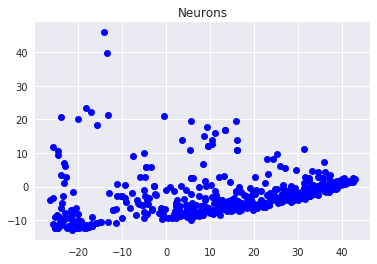

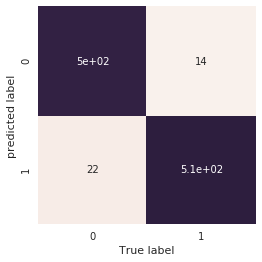

Pipeline(steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=70, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('Random_Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=...stimators=200, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])


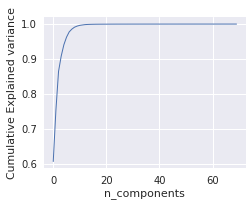

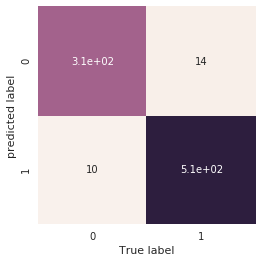

In [26]:
%run ./Pipeline_PCA_RANDOM_Forest_Copy1.ipynb

# Imshow specific images to understand non differentiation in PCA model

# process in order to display false predicted images

In [ ]:
def Get_IMG_failed_prediction(Validation_label_,predictions_RFC):

    fail_img_pred_N=np.zeros(Validation_label_.shape[0])
    fail_img_pred_A=np.zeros(Validation_label_.shape[0])
#     fail_img_pred_R=np.zeros(Validation_label_.shape[0])

    for t in range(0,Validation_label_.shape[0] ):
        if ((predictions_RFC[t]==1) & (Validation_label_[t]!=1)):
            fail_img_pred_A[t]=t

        if ((predictions_RFC[t]==2) & (Validation_label_[t]!=2)):
            fail_img_pred_N[t]=t
               
#         if ((predictions_RFC[t]!=0) & (Validation_label_[t]==0) ):
#             fail_img_pred_R[t]=t
        

    fail_img_pred_N=fail_img_pred_N[fail_img_pred_N!=0]
    fail_img_pred_A=fail_img_pred_A[fail_img_pred_A!=0]
#     fail_img_pred_R=fail_img_pred_R[fail_img_pred_R!=0]
#     return(fail_img_pred_N,fail_img_pred_A,fail_img_pred_R)
    return(fail_img_pred_N,fail_img_pred_A)

In [ ]:
(fail_img_pred_Neurons,fail_img_pred_Astrocytes)=Get_IMG_failed_prediction(yr,predictedVAL)

In [ ]:
sns.reset_orig() # sns.set()

In [ ]:
def Plot_Failed_IMG(GRAY_IM, fail_IMG):
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    for i in range(1,23): 
        plt.subplot(6,4, i)
        plt.title(int(fail_IMG[i-1]))
        plt.imshow(GRAY_IM[int(fail_IMG[i-1])])
       

In [ ]:
%matplotlib notebook

In [ ]:
Plot_Failed_IMG(GRAY_IM_parallel, fail_img_pred_Astrocytes)

In [ ]:
Plot_Failed_IMG(GRAY_IM_parallel, fail_img_pred_Neurons)

In [ ]:
def Get_DF_failed_predicions(Data_frame, fail_img_prediction):
    newDF=pd.DataFrame(data=None, columns=Data_frame.columns)
    for i in range(0, len(fail_img_prediction) ):
        newDF = newDF.append(Data_frame.loc[Data_frame.indice==(fail_img_prediction[i])].copy())
    return(newDF)

In [ ]:
Data_F_fail_Neurons=Get_DF_failed_predicions(Data_FRAMES, fail_img_pred_Neurons)

In [ ]:
Data_F_fail_Astrocytes=Get_DF_failed_predicions(Data_FRAMES, fail_img_pred_Astrocytes)

# test prediction sur  1 clone

In [27]:
import numpy as np
import pandas as pd
from functools import partial
import multiprocessing
from multiprocessing import Pool
from functools import partial

In [28]:
def get_coordinates(index_ligne,imageId, large):
    conn = BlitzGateway('tbacoyannis','d33pl34rn1ng',port=4064,host='chinensis.polytechnique.fr')
    connected = conn.connect()

    image = conn.getObject("Image", imageId)
    pixels = image.getPrimaryPixels() # get raw pixels information
    
    size_x= image.getSizeX()
    size_y= image.getSizeY()
    size_z = image.getSizeZ()
    size_c = image.getSizeC()
    size_t = image.getSizeT()
   
   
    delta_x=int(large/2)
    
    nb_fenetres=np.arange(size_x/delta_x)
    index=nb_fenetres
    
    x=(index*delta_x)+delta_x
    x=x[2:-2]
    y=((index_ligne*delta_x)+delta_x)*np.ones(len(x)) #(index))
    y=y[2:-2]
    
    Matrix=np.zeros((len(x),large,large,3))
    
    z=204
    
    tilewidths = np.ones(len(x),dtype=int)*large
    tileheights = tilewidths
    tilestacks = zip(x,y,tilewidths,tileheights)
    
    zstacks= np.ones(len(x),dtype=int)*z
    
    tstacks=np.zeros(len(x), dtype=int)
    
    for c in range(0,3):
        cstacks=np.ones(len(x), dtype=int)*c
        liste=zip(zstacks,cstacks,tstacks, tilestacks)
        pxobj = pixels.getTiles(liste)
        for i, p in enumerate(pxobj):
            Matrix[i,:,:,c]=p
    
    conn._closeSession()
    return(Matrix)

In [29]:
conn = BlitzGateway('tbacoyannis','d33pl34rn1ng',port=4064,host='chinensis.polytechnique.fr')
connected = conn.connect()

image = conn.getObject("Image", imageId)
pixels = image.getPrimaryPixels() # get raw pixels information

size_x=image.getSizeX()
size_y=image.getSizeY()
size_z = image.getSizeZ()
size_c = image.getSizeC()
size_t = image.getSizeT()

imageId=451
zsize=3
large=25
nidX=size_x/int(large/2)

index_ligne=(size_y/int(large/2))
index_ligne


491L

In [30]:
partial_getDATA_coord = partial(get_coordinates, imageId=imageId, large=large)

In [31]:
pool = multiprocessing.Pool(25)
M_Mv = pool.map(partial_getDATA_coord, xrange(488))
pool.close()

In [32]:
filename_M_Mv =projectpath+'io/Output/M_Mv.npy'

In [33]:
np.save(filename_M_Mv,M_Mv)

In [34]:
M_Mv=np.load(filename_M_Mv)

In [35]:
Matrix_TEST=np.reshape(M_Mv,((M_Mv.shape[0])*(M_Mv.shape[1]),25,25,3))

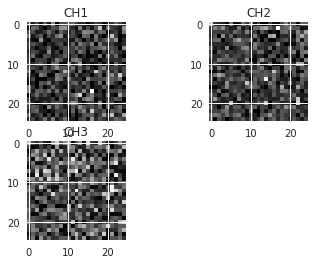

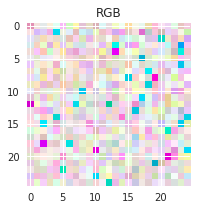

In [41]:
PLOT_Im(Matrix_TEST[234])

In [38]:
filename_Matrix_TEST =projectpath+'io/Output/Matrix_TEST.npy'

In [42]:
np.save(filename_Matrix_TEST,Matrix_TEST)

In [43]:
%run ./RGB2GRAY_PREDICT.ipynb

In [44]:
filename_GRAY_IM_TEST8PRED =projectpath+'io/Output/GRAY_IM_TEST8PRED.npy'

In [45]:
GRAY_IM_TEST8PRED_parallel=np.load(filename_GRAY_IM_TEST8PRED)

In [46]:
GRAY_IM_TEST8PRED_parallel.shape

(117608, 25, 25)

In [49]:
%run ./Features_Exctraction_PREDICT.ipynb

MemoryError: 

In [48]:
filename_FEATURES_TEST =projectpath+'io/Output/FEATURES_TEST.npy'

In [ ]:
FEATURES_TEST=np.load(filename_FEATURES_TEST)

In [ ]:
FEATURES_TEST_NAMES=FEATURES_TEST[:,1,:]

In [ ]:
FEATURES_TEST_VALUES=FEATURES_TEST[:,0,:]

In [ ]:
FEATURES_TEST_VALUES=FEATURES_TEST_VALUES.astype(float)

In [ ]:
filename_FEATURES_TEST_VALUES =projectpath+'io/Output/FEATURES_TEST_VALUES.npy'

In [ ]:
np.save(filename_FEATURES_TEST_VALUES,FEATURES_TEST_VALUES)

In [ ]:
FEATURES_TEST_VALUES=np.load(filename_FEATURES_TEST_VALUES)

In [ ]:
%run ./Features_Normalization_PREDICT.ipynb

In [ ]:
filename_FVN_TEST =projectpath+'io/Output/FV_N_TEST.npy'

In [ ]:
FV_N_TEST=np.load(filename_FVN_TEST)

In [ ]:
%run ./Pipeline_PCA_RANDOM_Forest_Copy1_PREDICT.ipynb

In [ ]:
filename_prediction_TEST =projectpath+'io/Output/prediction_TEST.npy'
prediction_TEST=np.load(filename_prediction_TEST)

In [ ]:
prediction_TEST

In [ ]:
lign_nan=np.ones(len(FV_N_TEST))
for i in range(0,len(FV_N_TEST)):
    a=np.isnan(FV_N_TEST[i])
    if np.any(a)==True:
        lign_nan[i]=0

In [ ]:
idx=np.argwhere(lign_nan==1)
idx_new=idx.flatten()

FV_N_TEST=FV_N_TEST[idx_new]

In [ ]:
FV_N_TEST.shape

In [ ]:
PLOT_Im(M_m[idx_new[4]])

In [ ]:
np.argwhere(lign_nan==1)
idx_new[4]